In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from prettytable import PrettyTable

In [ ]:
print(pd.__version__)
print(np.__version__)
print(tf.__version__)

1.3.5
1.21.6
2.9.2


In [2]:
rice = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/FinalProject_CS430/riceClassification.csv")

In [3]:
rice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               18185 non-null  int64  
 1   Area             18185 non-null  int64  
 2   MajorAxisLength  18185 non-null  float64
 3   MinorAxisLength  18185 non-null  float64
 4   Eccentricity     18185 non-null  float64
 5   ConvexArea       18185 non-null  int64  
 6   EquivDiameter    18185 non-null  float64
 7   Extent           18185 non-null  float64
 8   Perimeter        18185 non-null  float64
 9   Roundness        18185 non-null  float64
 10  AspectRation     18185 non-null  float64
 11  Class            18185 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 1.7 MB


In [4]:
X = rice.drop("Class", axis = 1)

In [5]:
y = rice.Class

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                    test_size=0.2, 
                                                    random_state=0)

In [ ]:
rice.isnull().sum()

id                 0
Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Perimeter          0
Roundness          0
AspectRation       0
Class              0
dtype: int64

In [ ]:
count0 = (rice.Class == 0).sum()
count1 = (rice.Class == 1).sum()
print(count0, count1)

8200 9985


##Correlation Matrix

In [ ]:
corr_matrix = rice.corr()
print(corr_matrix)

                       id      Area  MajorAxisLength  MinorAxisLength  \
id               1.000000  0.709155         0.464022         0.637148   
Area             0.709155  1.000000         0.599939         0.930215   
MajorAxisLength  0.464022  0.599939         1.000000         0.273211   
MinorAxisLength  0.637148  0.930215         0.273211         1.000000   
Eccentricity    -0.347816 -0.550073         0.295717        -0.808640   
ConvexArea       0.707600  0.999362         0.602061         0.928992   
EquivDiameter    0.706333  0.998158         0.618002         0.923790   
Extent           0.149924  0.230541        -0.073549         0.308541   
Perimeter        0.628830  0.881540         0.870178         0.674249   
Roundness        0.430033  0.620490        -0.202566         0.834398   
AspectRation    -0.382648 -0.623979         0.240471        -0.860516   
Class           -0.808591 -0.816589        -0.147741        -0.917766   

                 Eccentricity  ConvexArea  EquivDi

##Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(solver = 'lbfgs', 
                             multi_class='multinomial', 
                             max_iter = 10000)
LR_model.fit(X_train, y_train)
y_pred_LR = LR_model.predict(X_test)
LR_score = accuracy_score(y_test,y_pred_LR)

In [ ]:
print(LR_score)

0.9997250481165796


##Random Forest Classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier()
RF_model.fit(X_train, y_train)
y_pred_RF = RF_model.predict(X_test)
RF_score = accuracy_score(y_test, y_pred_RF)

In [ ]:
print(RF_score)

1.0


##Decision Tree Classifier

In [7]:
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion = 'gini', max_depth=3, random_state=0)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [8]:
y_pred_tree = clf_gini.predict(X_test)

In [9]:
DTC_score = clf_gini.score(X_test, y_test)
print(DTC_score)

0.9997250481165796


[Text(0.5555555555555556, 0.875, 'X[3] <= 59.423\ngini = 0.495\nsamples = 14548\nvalue = [6547, 8001]'),
 Text(0.3333333333333333, 0.625, 'X[0] <= 11823.5\ngini = 0.036\nsamples = 8093\nvalue = [150, 7943]'),
 Text(0.2222222222222222, 0.375, 'X[3] <= 58.888\ngini = 0.0\nsamples = 7944\nvalue = [1, 7943]'),
 Text(0.1111111111111111, 0.125, 'gini = 0.0\nsamples = 7910\nvalue = [0, 7910]'),
 Text(0.3333333333333333, 0.125, 'gini = 0.057\nsamples = 34\nvalue = [1, 33]'),
 Text(0.4444444444444444, 0.375, 'gini = 0.0\nsamples = 149\nvalue = [149, 0]'),
 Text(0.7777777777777778, 0.625, 'X[0] <= 2098.0\ngini = 0.018\nsamples = 6455\nvalue = [6397, 58]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 58\nvalue = [0, 58]'),
 Text(0.8888888888888888, 0.375, 'gini = 0.0\nsamples = 6397\nvalue = [6397, 0]')]

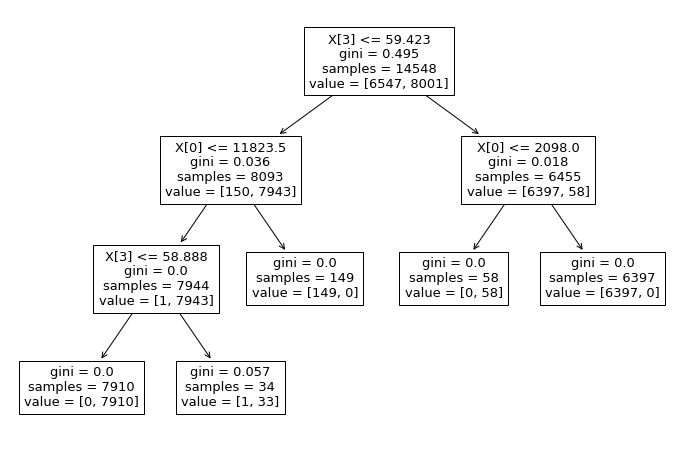

In [ ]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf_gini.fit(X_train, y_train))

##Support Vector Classifier

In [ ]:
from sklearn.svm import SVC
svc_clf = SVC(gamma='auto', probability = True)
svc_clf.fit(X_train, y_train)
y_pred_svc = svc_clf.predict(X_test)

SVC_score = accuracy_score(y_test, y_pred_svc)
print(SVC_score)

0.5457794885894969


##RandomizedSearchCV

In [ ]:
model_params = {
    'Logistic Regression': {
        'model': LogisticRegression(),
        'params': {
            'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
            'multi_class': ['auto', 'ovr', 'multinomial'],
            'max_iter': [100,200,500,1000]
        }
    },
    'RandomForest Classifier': {
        'model': RandomForestClassifier(),
        'params': {
            
        }
    },
    'Decision Tree Classifier': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini', 'entropy'],
            'max_depth': [3,5,10,20],
            'random_state': [0]
        }
    },
    'Support Vector Classifier': {
        'model': SVC(),
        'params': {
            'C': [0.1,1,10,20,100],
            'kernel': ['rbf', 'linear', 'poly']
        }
    }
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
scores = []
for model_name, model_parameter in model_params.items():
  clf = RandomizedSearchCV(model_parameter['model'], model_parameter['params'], 
                           cv = 6, 
                           return_train_score=False, 
                           n_iter = 20)
  clf.fit(X_train, y_train)
  scores.append({
    'model': model_name,
    'best_scores': clf.best_score_,
    'best_params': clf.best_params_
})

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means 

In [ ]:
scores

[{'model': 'Logistic Regression',
  'best_scores': 1.0,
  'best_params': {'solver': 'newton-cg',
   'multi_class': 'auto',
   'max_iter': 200}},
 {'model': 'RandomForest Classifier', 'best_scores': 1.0, 'best_params': {}},
 {'model': 'Decision Tree Classifier',
  'best_scores': 0.9998625429553264,
  'best_params': {'random_state': 0, 'max_depth': 3, 'criterion': 'gini'}},
 {'model': 'Support Vector Classifier',
  'best_scores': 1.0,
  'best_params': {'kernel': 'linear', 'C': 0.1}}]

##Artificial Neural Network

In [ ]:
#get number of columns in training data
n_cols = X_train.shape[1]

# builds model
model = Sequential()

model.add(Dense(150, activation='relu', 
                       input_shape=(n_cols,)))
model.add(Dense(150, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam',
              metrics = ["accuracy"])

#inspect the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 150)               1800      
                                                                 
 dense_7 (Dense)             (None, 150)               22650     
                                                                 
 dense_8 (Dense)             (None, 150)               22650     
                                                                 
 dense_9 (Dense)             (None, 150)               22650     
                                                                 
 dense_10 (Dense)            (None, 150)               22650     
                                                                 
 dense_11 (Dense)            (None, 1)                 151       
                                                                 
Total params: 92,551
Trainable params: 92,551
Non-trai

In [ ]:
from keras.callbacks import EarlyStopping
#train model and perform validation test

early_stop = EarlyStopping(monitor='accuracy', patience=30) # stops training when it doesn't show improvemnet.

history = model.fit(X_train, y_train, epochs = 300,
                    validation_split = 0.2, verbose = 1, callbacks = [early_stop])

Epoch 1/300
364/364 [==============================] - 3s 6ms/step - loss: 2936.4153 - accuracy: 0.4837 - val_loss: 1.3212 - val_accuracy: 0.6082
Epoch 2/300
364/364 [==============================] - 2s 5ms/step - loss: 1.1826 - accuracy: 0.5192 - val_loss: 0.8070 - val_accuracy: 0.4261
Epoch 3/300
364/364 [==============================] - 2s 5ms/step - loss: 1.3194 - accuracy: 0.5256 - val_loss: 0.7063 - val_accuracy: 0.4261
Epoch 4/300
364/364 [==============================] - 2s 5ms/step - loss: 1.8861 - accuracy: 0.5392 - val_loss: 0.6180 - val_accuracy: 0.4096
Epoch 5/300
364/364 [==============================] - 2s 4ms/step - loss: 2.5235 - accuracy: 0.5576 - val_loss: 0.8687 - val_accuracy: 0.6100
Epoch 6/300
364/364 [==============================] - 2s 5ms/step - loss: 2.5833 - accuracy: 0.5893 - val_loss: 9.5456 - val_accuracy: 0.5660
Epoch 7/300
364/364 [==============================] - 2s 5ms/step - loss: 6.5690 - accuracy: 0.5983 - val_loss: 0.6339 - val_accuracy: 0.5

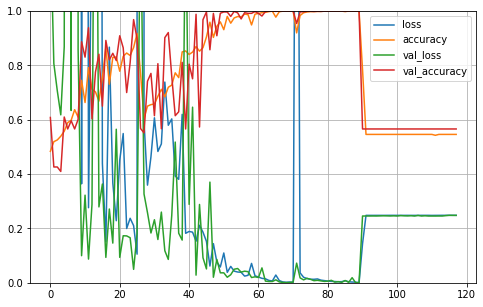

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) #Sets the vertical range
plt.show()

In [ ]:
ann_score = model.evaluate(X_test, y_test, verbose=1)
print('accuracy: ', ann_score[1]) #Accuracy

114/114 [==============================] - 1s 4ms/step - loss: 0.2488 - accuracy: 0.5455
accuracy:  0.5455045104026794


##Pretty Table

In [ ]:
myTable = PrettyTable(['Model', 'Best Score'])

myTable.add_row(['Logistic Regression', LR_score])
myTable.add_row(['Random Forest Classifer', RF_score])
myTable.add_row(['Decision Tree Classifier', DTC_score])
myTable.add_row(['Support Vector Classifer', SVC_score])
myTable.add_row(['Artifical Neural Network', ann_score[1]])

print(myTable)

+--------------------------+--------------------+
|          Model           |     Best Score     |
+--------------------------+--------------------+
|   Logistic Regression    | 0.9997250481165796 |
| Random Forest Classifer  |        1.0         |
| Decision Tree Classifier | 0.9997250481165796 |
| Support Vector Classifer | 0.5457794885894969 |
| Artifical Neural Network | 0.5455045104026794 |
+--------------------------+--------------------+


##Confusion Matrix and Classification Report

###Logistic Regression

In [ ]:
confusion_matrix(y_test, y_pred_LR)

array([[1653,    0],
       [   1, 1983]])

In [ ]:
print(classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1653
           1       1.00      1.00      1.00      1984

    accuracy                           1.00      3637
   macro avg       1.00      1.00      1.00      3637
weighted avg       1.00      1.00      1.00      3637



###Random Forest Classifier

In [ ]:
confusion_matrix(y_test, y_pred_RF)

array([[1653,    0],
       [   0, 1984]])

In [ ]:
print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1653
           1       1.00      1.00      1.00      1984

    accuracy                           1.00      3637
   macro avg       1.00      1.00      1.00      3637
weighted avg       1.00      1.00      1.00      3637



##Decision Tree Classifier

In [10]:
confusion_matrix(y_test, y_pred_tree)

array([[1652,    1],
       [   0, 1984]])

In [11]:
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1653
           1       1.00      1.00      1.00      1984

    accuracy                           1.00      3637
   macro avg       1.00      1.00      1.00      3637
weighted avg       1.00      1.00      1.00      3637



###Support Vector Classifier

In [ ]:
confusion_matrix(y_test, y_pred_svc)

array([[   1, 1652],
       [   0, 1984]])

In [ ]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       1.00      0.00      0.00      1653
           1       0.55      1.00      0.71      1984

    accuracy                           0.55      3637
   macro avg       0.77      0.50      0.35      3637
weighted avg       0.75      0.55      0.39      3637

